TASK 1 : IRIS FLOWER CLASSIFICATION

Iris flower has three speciess; setosa,versicolar, and virginica, which differs according to their measurements.Now assume that you have the measurements of the iris flowers according to their species,and here your task is to train a machine learning model that can leaarn from the measurements of the species and classify them.

In [23]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

Loading the dataset

In [24]:
df = pd.read_csv("/content/Iris.zip")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
#remoing the id
df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
#Statistics of the given data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Proprocessing the data

In [30]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

EXPLORATORY ANALYSIS

HISTOGRAMS

Text(0, 0.5, 'frequency')

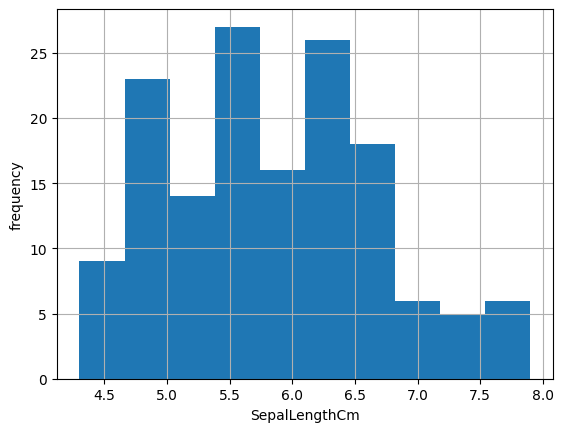

In [31]:
#histograms
#for sepallength
df['SepalLengthCm'].hist()
plt.xlabel('SepalLengthCm')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

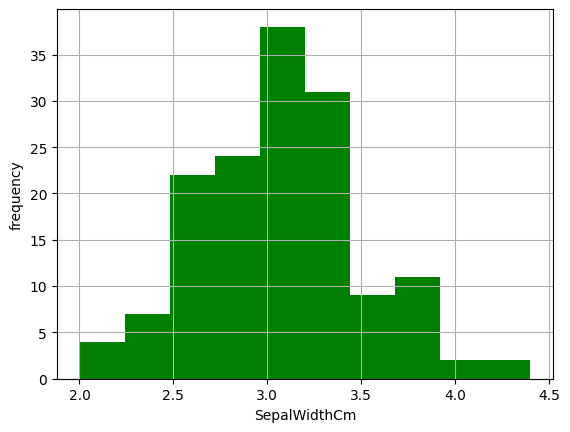

In [32]:
#sepal width
df['SepalWidthCm'].hist(color='Green')
plt.xlabel('SepalWidthCm')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

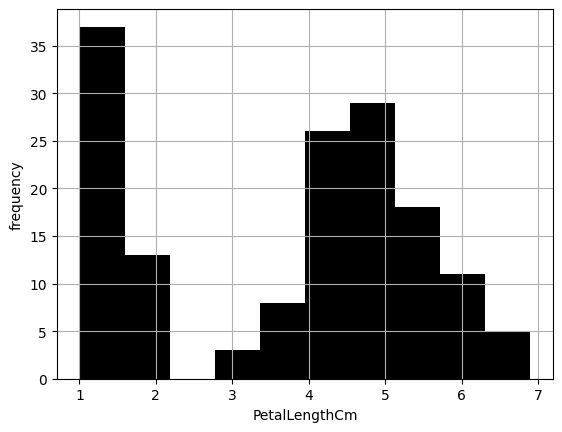

In [33]:
#for petalLength
df['PetalLengthCm'].hist(color='Black')
plt.xlabel('PetalLengthCm')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

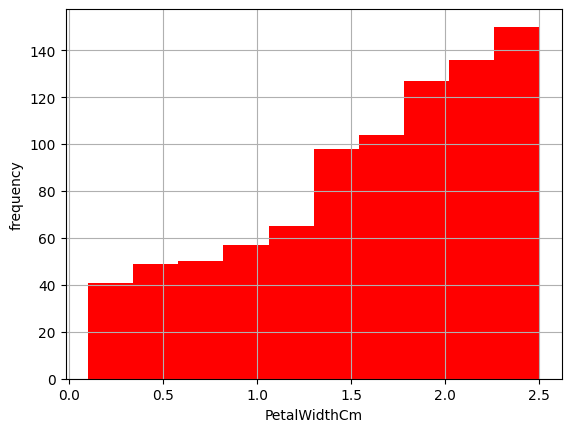

In [34]:
#for Petalwidth
df['PetalWidthCm'].hist(color='red',label='PetalWidthCm',cumulative=True)
plt.xlabel('PetalWidthCm')
plt.ylabel('frequency')

SCATTER PLOT

In [35]:
#scatter plot
colors = ['red','orange','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginoca']

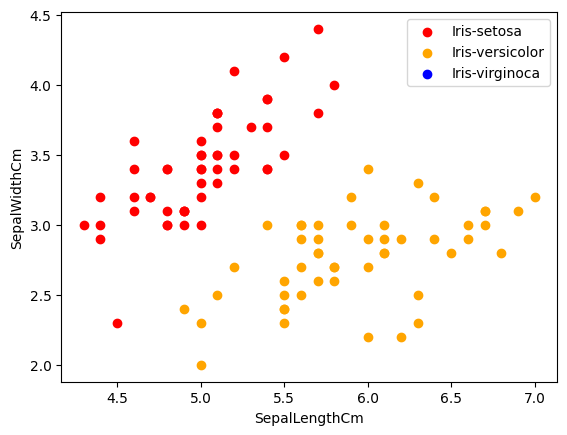

In [36]:
for i in range(len(species)):
  x = df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()

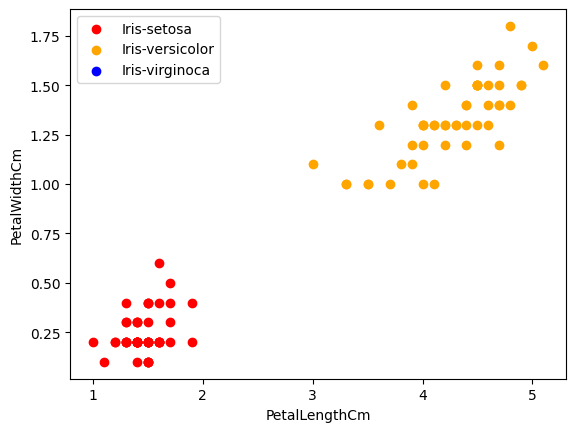

In [37]:
for i in range(len(species)):
  x = df[df['Species']==species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i],alpha=1)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

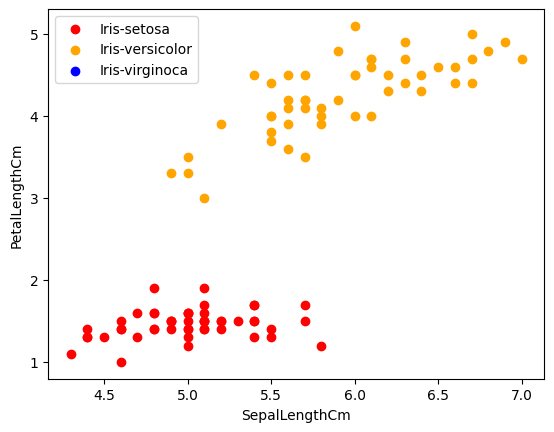

In [38]:
for i in range(len(species)):
  x = df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i],alpha=1)
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend()

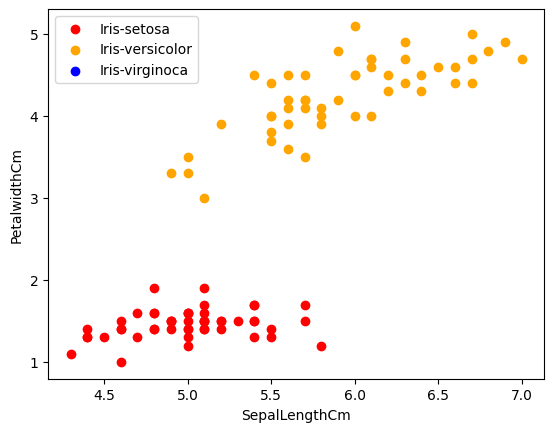

In [39]:
for i in range(len(species)):
  x = df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i],alpha=1)
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalwidthCm')
plt.legend()

SWARMPLOT

<Axes: ylabel='SepalWidthCm'>

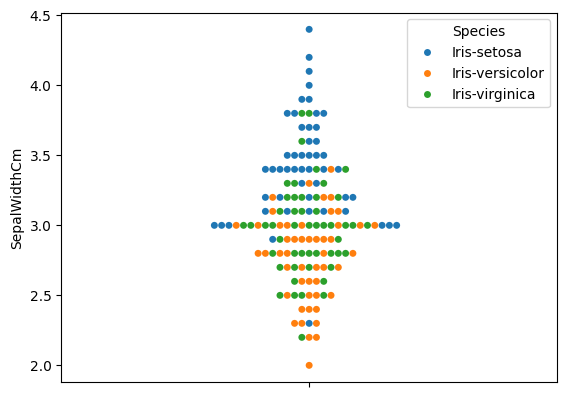

In [40]:
sns.swarmplot(hue='Species',y='SepalWidthCm',data=df)

<Axes: ylabel='SepalLengthCm'>

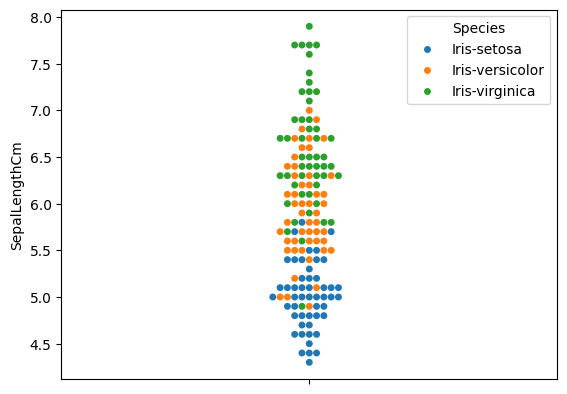

In [42]:
sns.swarmplot(hue='Species',y='SepalLengthCm',data=df)

<Axes: ylabel='PetalLengthCm'>

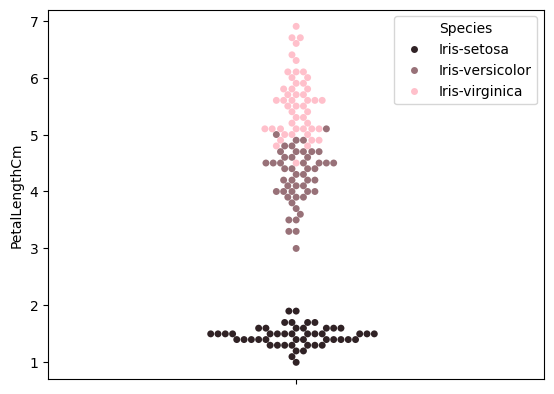

In [43]:
sns.swarmplot(hue='Species',y='PetalLengthCm',data=df,palette='dark:pink')

<Axes: ylabel='PetalWidthCm'>

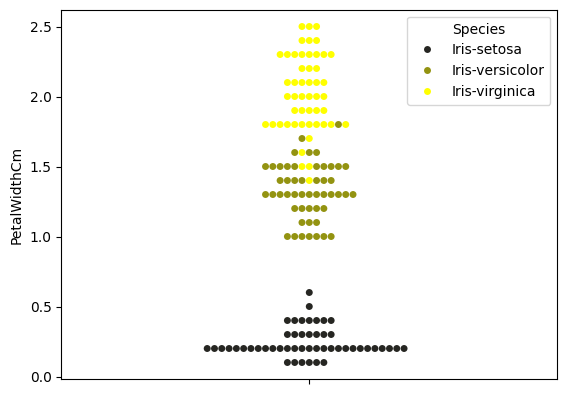

In [44]:
sns.swarmplot(hue='Species',y='PetalWidthCm',data=df,palette='dark:yellow')

PAIR PLOTS

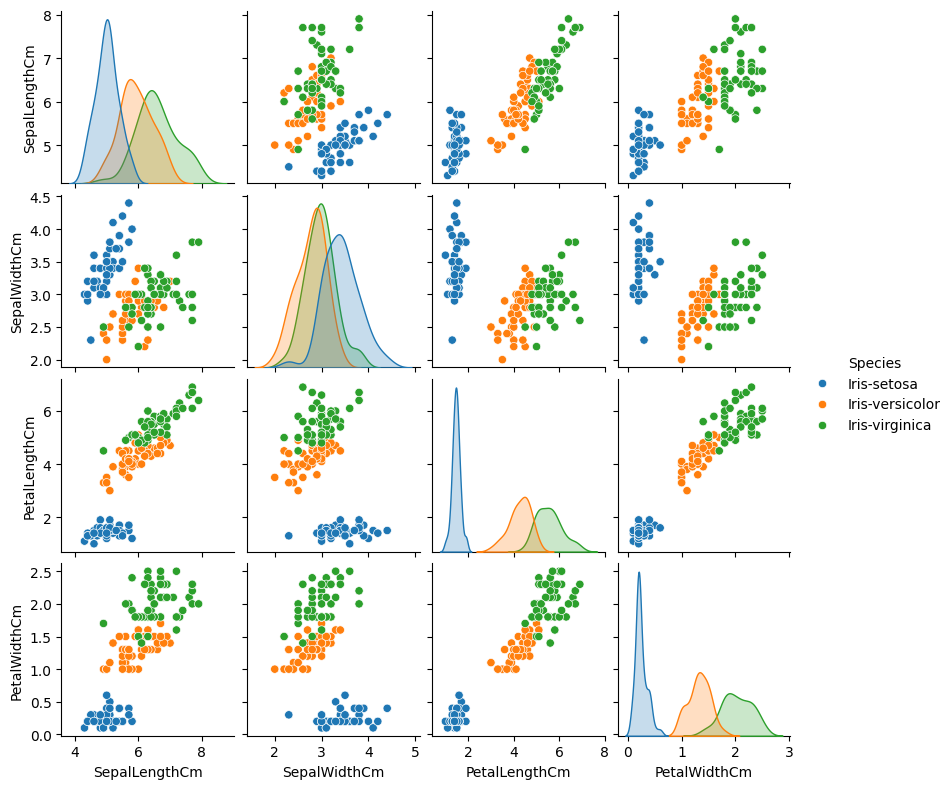

In [46]:
sns.pairplot(df,hue='Species',height=2)

HEATMAP

In [47]:
corr = df.corr(numeric_only=True)


<Axes: >

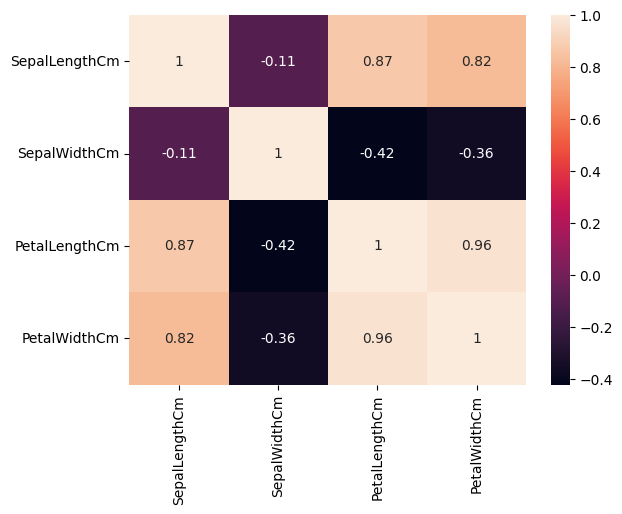

In [48]:
sns.heatmap(corr,annot=True)

BARPLOT

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

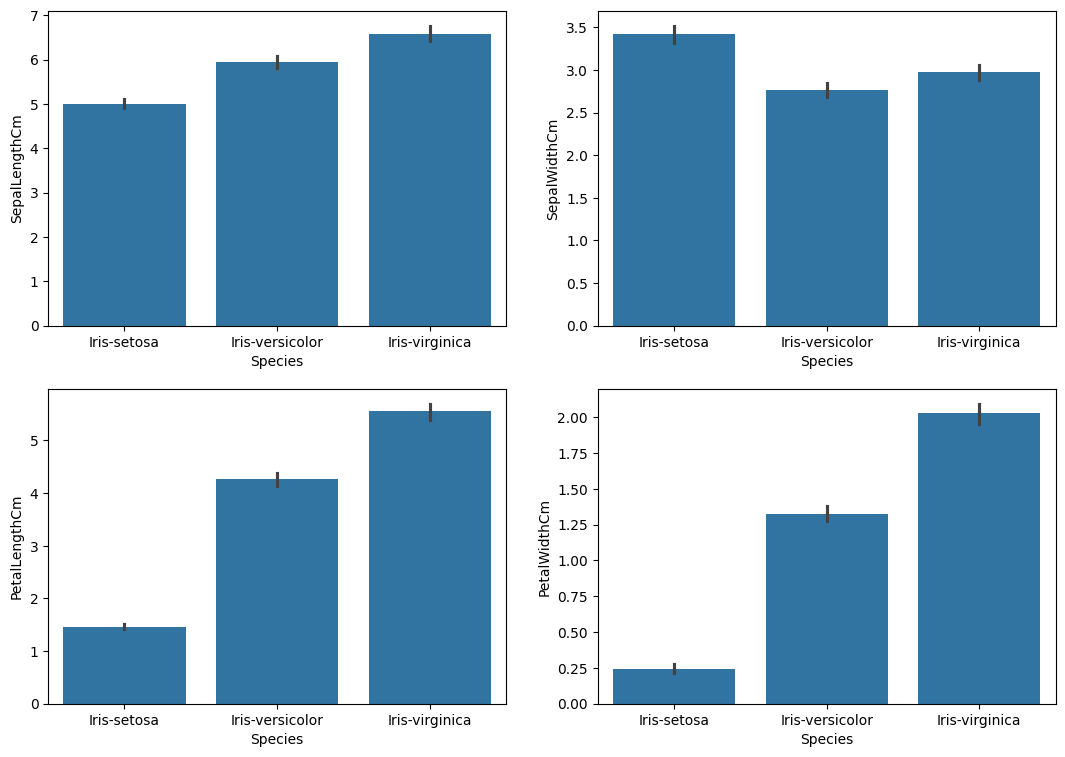

In [49]:
plt.figure(figsize=(13,9))
plt.subplot(2,2,1)
sns.barplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,2)
sns.barplot(x='Species',y='SepalWidthCm',data=df)
plt.subplot(2,2,3)
sns.barplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,4)
sns.barplot(x='Species',y='PetalWidthCm',data=df)

BOXPLOT

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

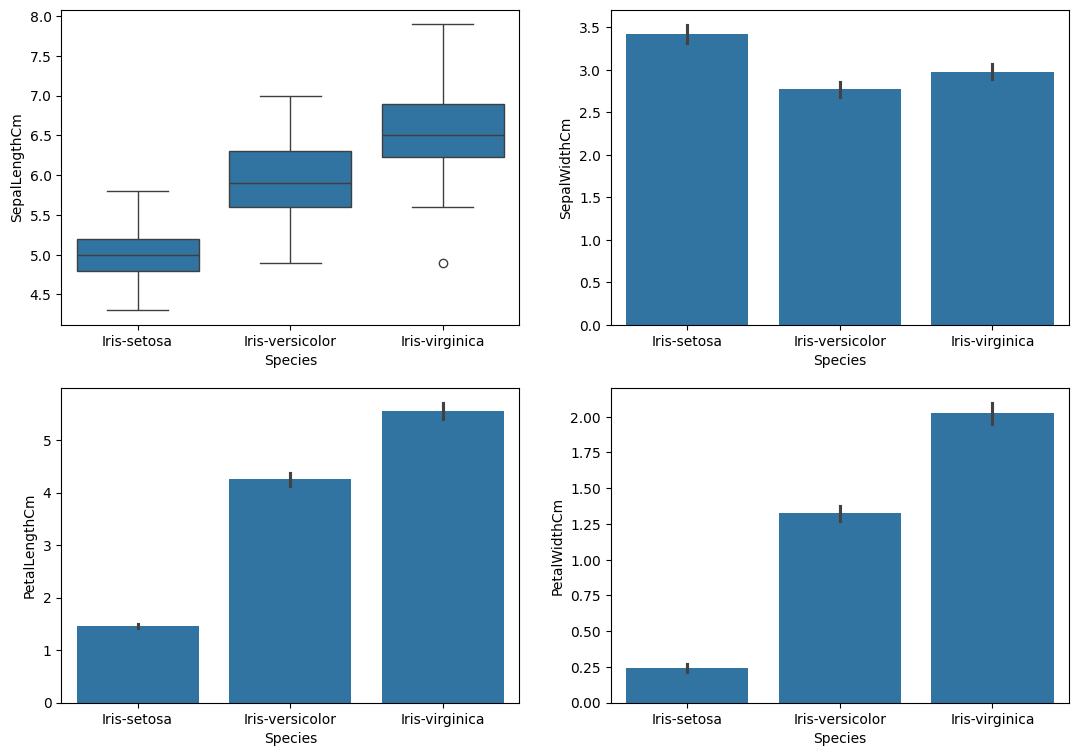

In [51]:
plt.figure(figsize=(13,9))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,2)
sns.barplot(x='Species',y='SepalWidthCm',data=df)
plt.subplot(2,2,3)
sns.barplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,4)
sns.barplot(x='Species',y='PetalWidthCm',data=df)

In [52]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size = 0.3)


In [54]:
#training data
train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
26,5.0,3.4,1.6,0.4,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
95,5.7,3.0,4.2,1.2,Iris-versicolor
102,7.1,3.0,5.9,2.1,Iris-virginica
66,5.6,3.0,4.5,1.5,Iris-versicolor
...,...,...,...,...,...
31,5.4,3.4,1.5,0.4,Iris-setosa
44,5.1,3.8,1.9,0.4,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
83,6.0,2.7,5.1,1.6,Iris-versicolor


In [55]:
test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
86,6.7,3.1,4.7,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
111,6.4,2.7,5.3,1.9,Iris-virginica
61,5.9,3.0,4.2,1.5,Iris-versicolor
73,6.1,2.8,4.7,1.2,Iris-versicolor
87,6.3,2.3,4.4,1.3,Iris-versicolor
14,5.8,4.0,1.2,0.2,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
106,4.9,2.5,4.5,1.7,Iris-virginica
71,6.1,2.8,4.0,1.3,Iris-versicolor


In [59]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]#attributes
train_Y = train[['Species']]#target

In [60]:
train_X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
26,5.0,3.4,1.6,0.4
101,5.8,2.7,5.1,1.9
95,5.7,3.0,4.2,1.2
102,7.1,3.0,5.9,2.1
66,5.6,3.0,4.5,1.5
...,...,...,...,...
31,5.4,3.4,1.5,0.4
44,5.1,3.8,1.9,0.4
2,4.7,3.2,1.3,0.2
83,6.0,2.7,5.1,1.6


In [61]:
train_Y

,Species
26,Iris-setosa
101,Iris-virginica
95,Iris-versicolor
102,Iris-virginica
66,Iris-versicolor
...,...
31,Iris-setosa
44,Iris-setosa
2,Iris-setosa
83,Iris-versicolor


In [63]:
test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_Y = test[['Species']]

In [64]:
test_X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
86,6.7,3.1,4.7,1.5
52,6.9,3.1,4.9,1.5
111,6.4,2.7,5.3,1.9
61,5.9,3.0,4.2,1.5
73,6.1,2.8,4.7,1.2
87,6.3,2.3,4.4,1.3
14,5.8,4.0,1.2,0.2
16,5.4,3.9,1.3,0.4
106,4.9,2.5,4.5,1.7
71,6.1,2.8,4.0,1.3


In [66]:
test_Y

,Species
86,Iris-versicolor
52,Iris-versicolor
111,Iris-virginica
61,Iris-versicolor
73,Iris-versicolor
87,Iris-versicolor
14,Iris-setosa
16,Iris-setosa
106,Iris-virginica
71,Iris-versicolor


MODEL Training

1.Decision tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
model1  = DecisionTreeClassifier()
model1.fit(train_X,train_Y)
Y_predict = model1.predict(test_X)

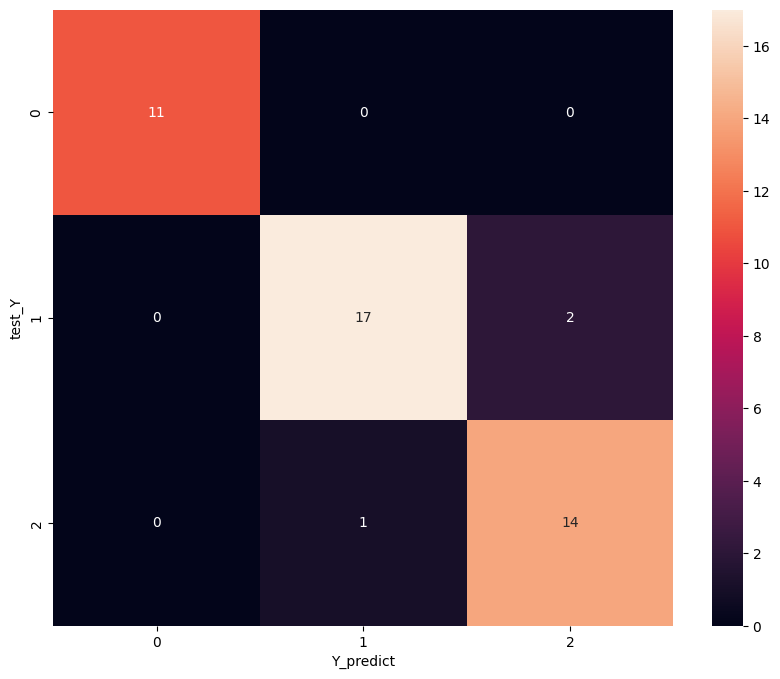

In [68]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(Y_predict,test_Y)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True)
plt.xlabel('Y_predict')
plt.ylabel('test_Y')
plt.show()

In [71]:
print(classification_report(Y_predict,test_Y))
print('accuracy-score',accuracy_score(Y_predict,test_Y))
print('Model score',model1.score(test_X,test_Y))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.94      0.89      0.92        19
 Iris-virginica       0.88      0.93      0.90        15

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.94        45
   weighted avg       0.93      0.93      0.93        45

accuracy-score 0.9333333333333333
Model score 0.9333333333333333


In [72]:
X_new = np.array([[3,2,1,0.2],[4.9,2.2,3.8,1.1]])
#Prediction of the species
prediction = model1.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
